# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    d = (x**2)*numpy.sin(x)
    return d

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    o = (2*x*numpy.sin(x)) - (((x**2) - 2)*numpy.cos(x)) - 2
    return o

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    e = g(xmax) - g(xmin)
    return e

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [11]:
''''def m(c):
    #cth midpoint of the c out of N slice
    q = xmin + (c-1)*((xmax - xmin)/N) + (xmax - xmin)/(2*N)
    return q

def z(xmax,xmin,N):
    b = (xmax-xmin)/N
    return b
'''
'''
def integrate_numeric(xmin, xmax, N):
    for i in range(1,N,1):
        v = ((xmax - xmin)/N)*(4*f(m(i)))
        return v
                           
    for i in range(xmin,xmax,z(xmax,xmin,N)):
        k = ((xmax - xmin)/N)*((- f(xmin) - f(xmax) + 2*f(i))) #actually -thefmaxfmin and over all )
        return k
                            
    l = v + k
    return l
'''
'''''def integrate_numeric(xmin, xmax, N):
    for i in range(1,N,1):
        v = ((xmax - xmin)/N)*(4*f(m(i)))
        return v
    
    j = xmin
    while j < xmax :
        j+= z(xmax,xmin,N)
        k = ((xmax - xmin)/N)*((- f(xmin) - f(xmax) + 2*f(j))) #actually -thefmaxfmin and over all )
        return k
                            
    l = v + k
    return l
'''

#try by defining function to put in f like did for m to take range from 1 to N
'''
j = xmin
while j < xmax :
    j+= z(xmax,xmin,N)
'''

def integrate_numeric(xmin,xmax,N):
    dx = (xmax-xmin)/(N)
    x = numpy.linspace(xmin,xmax,N+1)
    x_half = numpy.linspace(xmin+dx/2,xmax-dx/2,N)
    
    S = f(x[0])
    S += f(x[len(x)-1])
    for i in range (1,len(x)-1):
        S += 2*f(x[i])
    for i in range (0,len(x_half)):
        S += 4*f(x_half[i])
    S *= (dx/6)
    
    return S


Make sure you have implemented Simpson's rule correctly:

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


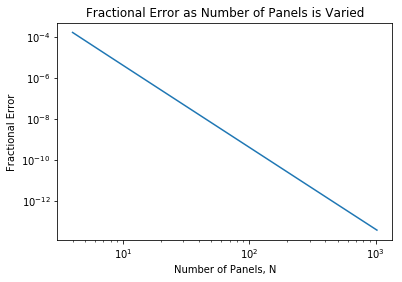

In [14]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution plt.yscales
result_numeric = []
fractional_error = []
for i in range (0,len(panel_counts)):
    result_numeric.append(integrate_numeric(x0,x1,panel_counts[i]))
    fractional_error.append((result_analytic - result_numeric[i])/result_analytic)
plt.plot(panel_counts, fractional_error)
plt.yscale('log')
plt.xscale('log')
plt.title('Fractional Error as Number of Panels is Varied')
plt.xlabel('Number of Panels, N')
plt.ylabel('Fractional Error')
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

In general, increasing the number of panels increases he accuracy of the numerical method (the fractional error decreases - see graph above). However, if the number of panels is so large that numerical errors are incurred (due to limitations in how many digits can be stored by a computer) the accuracy decreases. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

accuracy still increases as panel count increases, but by a lesser degree. To determine an integral to the same accuracy as one detrmined by Simpson's rule, twice the number of panels would be required using the trapezium rule. 